In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = randn(25)

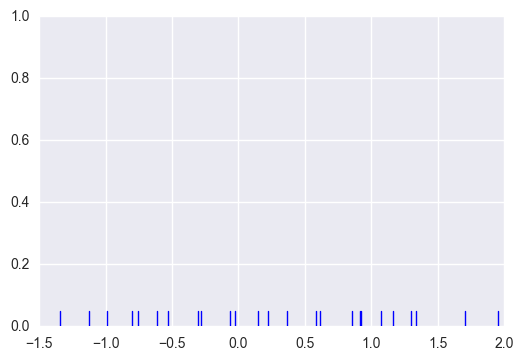

In [3]:
sns.rugplot(dataset)

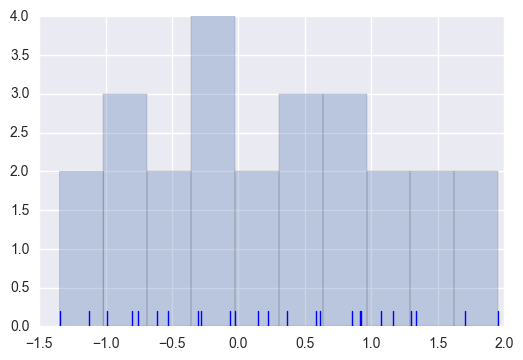

In [4]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

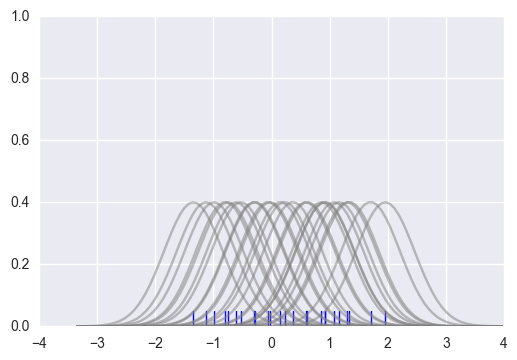

In [19]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

#find the bandwidth equation on wikipedia kernel density page
bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2 

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    #print(kernel)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha=0.5)

plt.ylim(0,1)

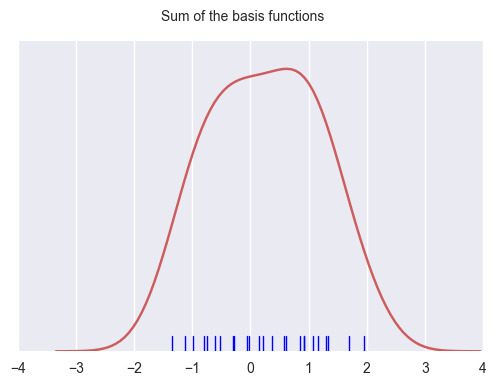

In [21]:
sum_of_kdt = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kdt, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

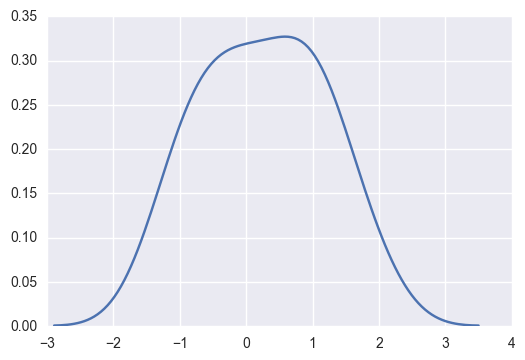

In [22]:
sns.kdeplot(dataset)

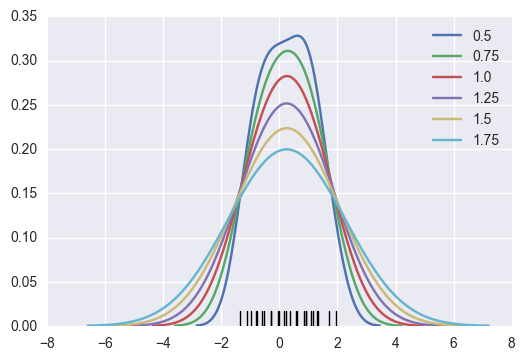

In [30]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5, 2.0, 0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

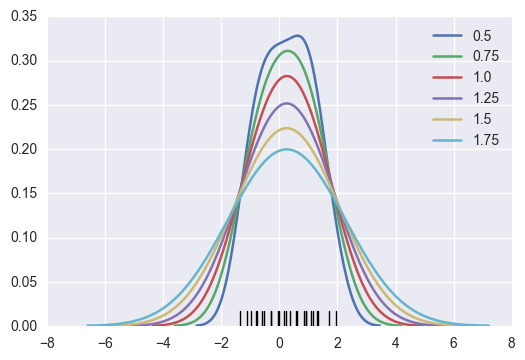

In [27]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5, 2.0, 0.25):
    sns.kdeplot(dataset, bw=bw, lw= 1.8, label=bw)

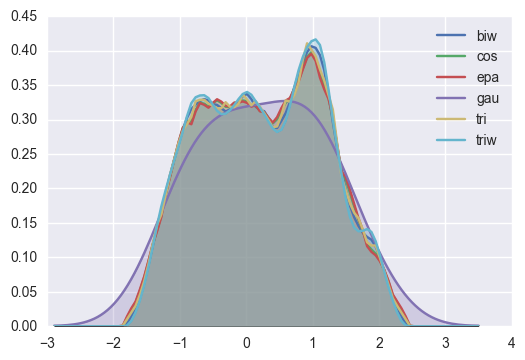

In [32]:
kernel_options = ['biw', 'cos', 'epa','gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern, shade=True)

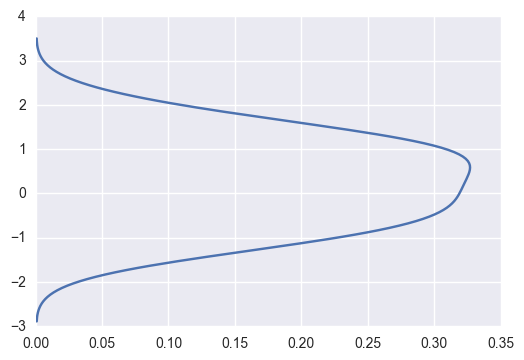

In [33]:
sns.kdeplot(dataset,vertical=True)

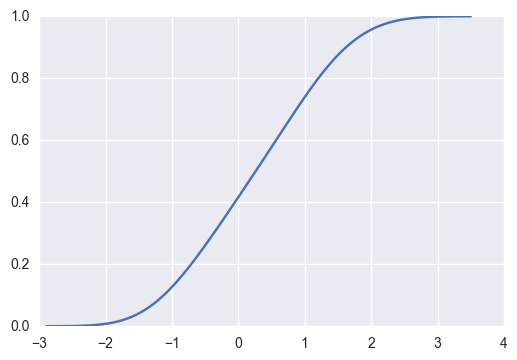

In [35]:
sns.kdeplot(dataset, cumulative=True)